In [1]:
%matplotlib inline

import spacy
from spacy import displacy
import networkx as nx

%run ../script/webnlg.py

train_dev = WebNLGCorpus.load(['train', 'dev'])

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
e = train_dev.sample(idx='5_40')

In [4]:
e

Triple info: {'category': 'Food', 'eid': 'Id41', 'idx': '5_40', 'ntriples': 1}

	Modified triples:

Asam_pedas | alternativeName | "Asam padeh"


	Lexicalizations:

The alternative name for asam pedas is asam padeh.
Asam padeh is also known as Asam pedas.
An alternative name for Asam pedas is Asam padeh.

In [25]:
docs = [nlp(lex) for lex in e.lexes()]

In [26]:
displacy.render(docs[0], style='dep', jupyter=True)

In [27]:
displacy.render(docs[1], style='dep', jupyter=True)

In [28]:
displacy.render(docs[2], style='dep', jupyter=True)

In [39]:
def make_graph(doc):
    
    g = nx.DiGraph()
    
    for token in doc:

        if token.dep_ != 'ROOT':

            g.add_edge(token.head, token, dep=token.dep_, pos=token.pos_)
            g.nodes[token.head]['token'] = token.head
            g.nodes[token]['token'] = token
            
    return g
    
    
gs = [make_graph(doc) for doc in docs]

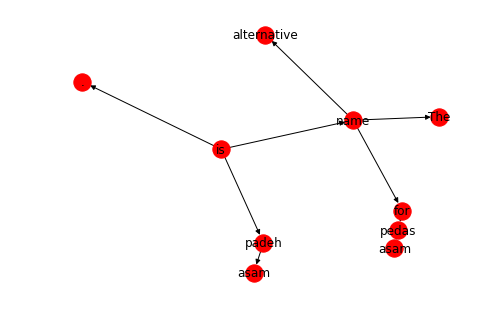

In [35]:
nx.draw(gs[0], with_labels=True)

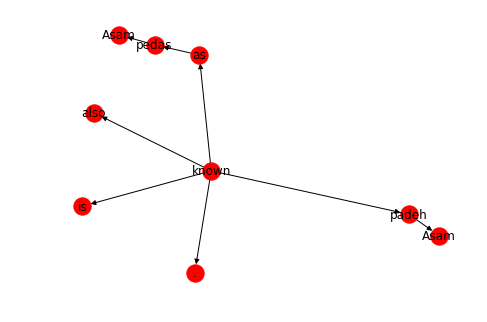

In [36]:
nx.draw(gs[1], with_labels=True)

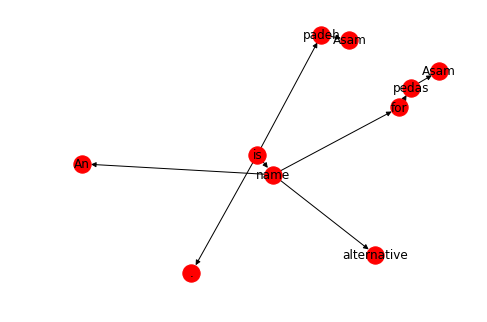

In [37]:
nx.draw(gs[2], with_labels=True)

# Calculating graph similarities between dependencies trees

In [43]:
from itertools import islice
import numpy as np
from networkx.algorithms import similarity

In [69]:
%%time 

def p(x, y):
    
    x, y = x['token'], y['token']
    
    sim = x.similarity(y)
    
    return sim

def calculate_distances(hypothesis_doc, hypothesis_g, n=10):
    
    sims = []

    for doc, g in zip(docs, gs):

        print(f'doc 1: "{hypothesis_doc}"')
        print(f'doc 2: "{doc}"')

        sim = list(islice(similarity.optimize_graph_edit_distance(hypothesis_g, g), 0, n))[-1]
        sims.append(sim)

        print(f'Edit distance = {sim}')

        print("\n")
    print(f'Mean: {np.mean(sims)}')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [72]:
N = 2

In [77]:
hypothesis_doc = nlp("I call Asam pedas as Asam padeh")
hypothesis_g = make_graph(hypothesis_doc)    

calculate_distances(hypothesis_doc, hypothesis_g, n=N)

doc 1: "I call Asam pedas as Asam padeh"
doc 2: "The alternative name for asam pedas is asam padeh."
Edit distance = 8.0


doc 1: "I call Asam pedas as Asam padeh"
doc 2: "Asam padeh is also known as Asam pedas."
Edit distance = 8.0


doc 1: "I call Asam pedas as Asam padeh"
doc 2: "An alternative name for Asam pedas is Asam padeh."
Edit distance = 8.0


Mean: 8.0


In [74]:
calculate_distances(docs[0], gs[0], n=N)

doc 1: "The alternative name for asam pedas is asam padeh."
doc 2: "The alternative name for asam pedas is asam padeh."
Edit distance = 0.0


doc 1: "The alternative name for asam pedas is asam padeh."
doc 2: "Asam padeh is also known as Asam pedas."
Edit distance = 14.0


doc 1: "The alternative name for asam pedas is asam padeh."
doc 2: "An alternative name for Asam pedas is Asam padeh."
Edit distance = 0.0


Mean: 4.666666666666667


In [75]:
calculate_distances(docs[1], gs[1], n=N)

doc 1: "Asam padeh is also known as Asam pedas."
doc 2: "The alternative name for asam pedas is asam padeh."
Edit distance = 10.0


doc 1: "Asam padeh is also known as Asam pedas."
doc 2: "Asam padeh is also known as Asam pedas."
Edit distance = 0.0


doc 1: "Asam padeh is also known as Asam pedas."
doc 2: "An alternative name for Asam pedas is Asam padeh."
Edit distance = 10.0


Mean: 6.666666666666667


In [76]:
calculate_distances(docs[2], gs[2], n=N)

doc 1: "An alternative name for Asam pedas is Asam padeh."
doc 2: "The alternative name for asam pedas is asam padeh."
Edit distance = 0.0


doc 1: "An alternative name for Asam pedas is Asam padeh."
doc 2: "Asam padeh is also known as Asam pedas."
Edit distance = 14.0


doc 1: "An alternative name for Asam pedas is Asam padeh."
doc 2: "An alternative name for Asam pedas is Asam padeh."
Edit distance = 0.0


Mean: 4.666666666666667
